In [441]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from astropy.time import Time
from astropy.coordinates import get_sun, SkyCoord
import astropy.units as u

In [443]:
df = pd.read_csv('lensing_data - Sheet1.csv')

In [507]:
scale = 1/2

# --- Convert Deflection from Arcseconds to Degrees
df['deflection_arcsec'] = df['deflection_arcsec'] * u.deg * scale

In [509]:
# --- Get Sun's Position
eclipse_time = Time('2017-08-21 18:26:00') # time during the 2017 solar eclipse

sun = get_sun(eclipse_time)           # tells us where the sun is in the sky during the eclipse
sun_coord = SkyCoord(sun.ra, sun.dec) # turns the location into numbers
sun_ra = sun_coord.ra.deg             # finds Right Accession of location number in degrees
sun_dec = sun_coord.dec.deg           # finds Declination of location number in degrees

print(f'Sun RA: {sun_coord.ra.deg:.2f} deg')
print(f'Sun DEC: {sun_coord.dec.deg:.2f} deg')

Sun RA: 150.78 deg
Sun DEC: 11.95 deg


In [510]:
# --- Unit vectors toward the sun
delta_ra = sun_ra + df['ra_deg']    # finds how many degrees left/right the star is from the sun
delta_dec = sun_dec + df['dec_deg'] # finds how many degrees up/down the star is from the sun

dist = np.sqrt(delta_ra**2 + delta_dec**2) # finds angular distance between each star and the sun

unit_ra = delta_ra / dist # Converts the RA/Dec differences into a unit vector (direction toward the Sun)
unit_dec = delta_dec / dist

In [511]:
# --- Find Lensed Positions ---
df['ra_lensed'] = df['ra_deg'] + (df['deflection_arcsec'] * unit_ra)
df['dec_lensed'] = df['dec_deg'] + (df['deflection_arcsec'] * unit_dec)

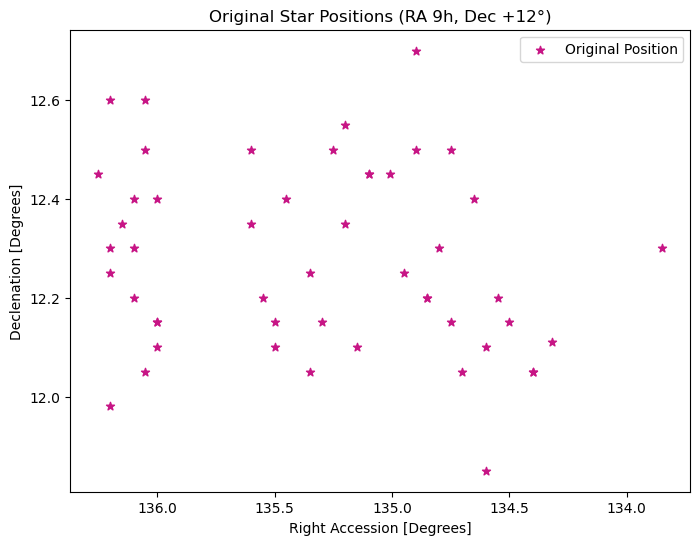

In [512]:
plt.figure(figsize = (8, 6))
plt.scatter(df['ra_deg'], df['dec_deg'], color='mediumvioletred', label='Original Position', marker = '*')
plt.xlabel('Right Accession [Degrees]')
plt.ylabel('Declenation [Degrees]')
plt.title('Original Star Positions (RA 9h, Dec +12°)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

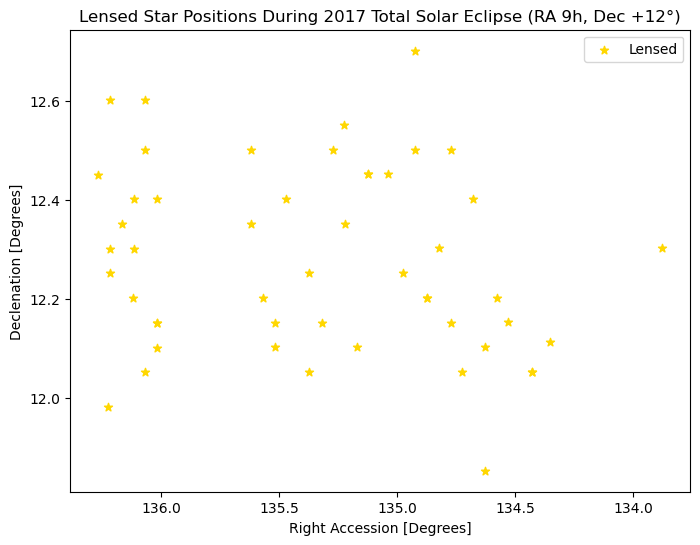

In [513]:
plt.figure(figsize = (8, 6))
plt.scatter(df['ra_lensed'], df['dec_lensed'], color='gold', label='Lensed', marker = '*')
plt.xlabel('Right Accession [Degrees]')
plt.ylabel('Declenation [Degrees]')
plt.title('Lensed Star Positions During 2017 Total Solar Eclipse (RA 9h, Dec +12°)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

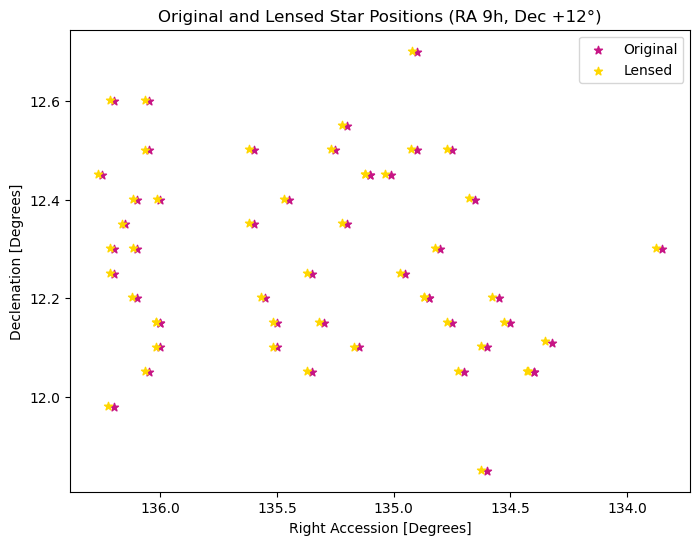

In [514]:
plt.figure(figsize = (8, 6))
plt.scatter(df['ra_deg'], df['dec_deg'], color='mediumvioletred', label='Original', marker = '*')
plt.scatter(df['ra_lensed'], df['dec_lensed'], color='gold', label='Lensed', marker = '*')
plt.xlabel('Right Accession [Degrees]')
plt.ylabel('Declenation [Degrees]')
plt.title('Original and Lensed Star Positions (RA 9h, Dec +12°)')

plt.gca().invert_xaxis()
plt.legend()
plt.show()

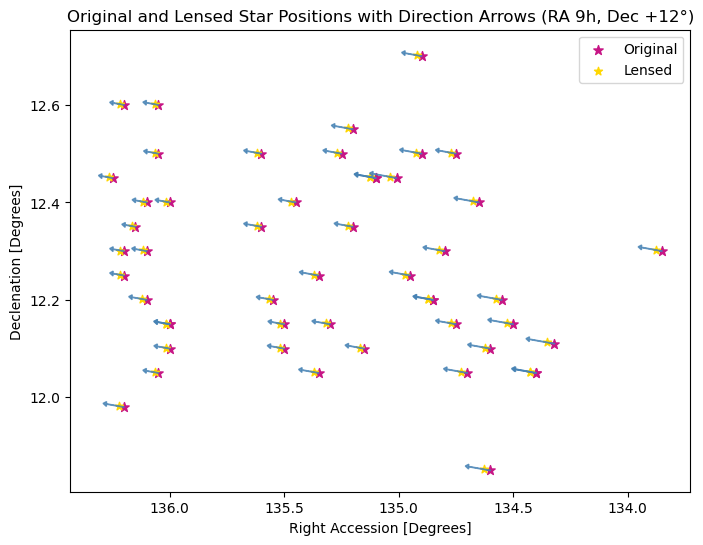

In [515]:
plt.figure(figsize = (8, 6))
plt.scatter(df['ra_deg'], df['dec_deg'], color='mediumvioletred', label='Original', marker = '*', s = 50)
plt.scatter(df['ra_lensed'], df['dec_lensed'], color='gold', label='Lensed', marker = '*')

plt.xlabel('Right Accession [Degrees]')
plt.ylabel('Declenation [Degrees]')
plt.title('Original and Lensed Star Positions with Direction Arrows (RA 9h, Dec +12°)')

arrow_scale = 4 # scale factor to make tiny deflections visible
for _, row in df.iterrows():
    plt.arrow(row['ra_deg'], row['dec_deg'],
    (row['ra_lensed'] - row['ra_deg']) * arrow_scale,
    (row['dec_lensed'] - row['dec_deg']) * arrow_scale,
    color='steelblue', alpha=0.8, head_width=0.01, length_includes_head=True)

plt.gca().invert_xaxis()
plt.legend()
plt.show()